# Module 10: Sentiment Analysis of Novels 

* Grace Lyons
* kat3ac

# Set Up

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

data_dir = '/content/drive/My Drive/DS_5001/MOD10/'

Mounted at /content/drive


In [2]:
novels = data_dir + 'TOKEN2.csv'
lib = data_dir + 'LIB.csv'
OHCO = ['author', 'title', 'chap_id', 'para_num', 'sent_num'] # We exclude genre
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

mobydick = ('melville','Moby Dick; or The Whale')
persuasion = ('austen','Persuasion')

salex_csv = data_dir + 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

## Import

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [4]:
sns.set()
%matplotlib inline

## Get Lexicon

In [5]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [6]:
salex['polarity'] = salex.positive - salex.negative

## Get lexicon columns

In [7]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [8]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

# Get Novels

In [9]:
TOKENS = pd.read_csv(novels) # .set_index(OHCO).sort_index()
LIB = pd.read_csv(lib)

In [63]:
# LIB.title = LIB.title.str.replace(' ', '')
# LIB.title = LIB.title.str.replace(';', '')
# LIB.sample(10)

,book_id,book_title,book_file,author,title
17,15859,"The Piazza Tales, by Herman Melville",epubs/MELVILLE_HERMAN_THE_PIAZZA_TALES-pg15859...,melville,ThePiazzaTales
14,8118,"Redburn. His First Voyage, by Herman Melville",epubs/MELVILLE_HERMAN_REDBURN_HIS_FIRST_VOYAGE...,melville,Redburn.HisFirstVoyage
11,2701,"Moby Dick; or The Whale, by Herman Melville",epubs/MELVILLE_HERMAN_MOBY_DICK_OR_THE_WHALE-p...,melville,MobyDickorTheWhale
5,105,"Persuasion, by Jane Austen",epubs/AUSTEN_JANE_PERSUASION-pg105.txt,austen,Persuasion
12,4045,"Omoo: Adventures in the South Seas, by Herman ...",epubs/MELVILLE_HERMAN_OMOO_ADVENTURES_IN_THE_S...,melville,Omoo:AdventuresintheSouthSeas
13,34970,"Pierre; or The Ambiguities, by Herman Melville",epubs/MELVILLE_HERMAN_PIERRE_OR_THE_AMBIGUITIE...,melville,PierreorTheAmbiguities
2,1212,"Love And Freindship And Other Early Works, by ...",epubs/AUSTEN_JANE_LOVE_AND_FREINDSHIP_SIC_-pg1...,austen,LoveAndFreindshipAndOtherEarlyWorks
9,13720,"Mardi: and A Voyage Thither, Vol. I (of 2)",epubs/MELVILLE_HERMAN_MARDI_AND_A_VOYAGE_THITH...,melville,"Mardi:andAVoyageThither,Vol.I(of2)"
3,141,"Mansfield Park, by Jane Austen",epubs/AUSTEN_JANE_MANSFIELD_PARK-pg141.txt,austen,MansfieldPark
1,946,"Lady Susan, by Jane Austen",epubs/AUSTEN_JANE_LADY_SUSAN-pg946.txt,austen,LadySusan


In [10]:
TOKENS = pd.merge(TOKENS, LIB, on = ['book_id'])\
                .drop(['book_title', 'book_file', 'book_id'], axis = 1)\
                .set_index(OHCO).sort_index()

In [11]:
TOKENS.head()

token_num             pos_tuple  pos  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0                 0       ('Emma', 'NNP')  NNP   
                              0                 1  ('Woodhouse', 'NNP')  NNP   
                              0                 3    ('handsome', 'NN')   NN   
                              0                 5      ('clever', 'NN')   NN   
                              0                 7         ('and', 'CC')   CC   

                                        token_str   term_str  term_id  
author title chap_id para_num sent_num                                 
austen Emma  1       1        0              Emma       emma    11614  
                              0         Woodhouse  woodhouse    39340  
                              0          handsome   handsome    15924  
                              0            clever     clever     6354  
                              0               and        and     1426

In [12]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [13]:
TOKENS[salex.columns].sample(10)

anger  \
author   title                              chap_id para_num sent_num          
austen   Pride and Prejudice                31      30       1           0.0   
         Emma                               34      50       2           0.0   
         Pride and Prejudice                40      4        0           0.0   
                                            42      17       3           0.0   
         Mansfield Park                     41      18       0           0.0   
melville Omoo: Adventures in the South Seas 6       4        2           0.0   
austen   Emma                               46      42       0           0.0   
melville Typee                              20      145      0           0.0   
         Omoo: Adventures in the South Seas 66      3        3           0.0   
austen   Pride and Prejudice                26      26       4           0.0   

                                                                       anticipation  \
author   title                              chap_id para_num sent_num                 
austen   Pride and Prejudice                31      30       1                  0.0   
         Emma                               34      50       2                  0.0   
         Pride and Prejudice                40      4        0                  0.0   
                                            42      17       3                  0.0   
         Mansfield Park                     41      18       0                  0.0   
melville Omoo: Adventures in the South Seas 6       4        2                  0.0   
austen   Emma                               46      42       0                  0.0   
melville Typee                              20      145      0                  0.0   
         Omoo: Adventures in the South Seas 66      3        3                  0.0   
austen   Pride and Prejudice                26      26       4                  0.0   

                                                                       disgust  \
author   title                              chap_id para_num sent_num            
austen   Pride and Prejudice                31      30       1             0.0   
         Emma                               34      50       2             0.0   
         Pride and Prejudice                40      4        0             0.0   
                                            42      17       3             0.0   
         Mansfield Park                     41      18       0             0.0   
melville Omoo: Adventures in the South Seas 6       4        2             0.0   
austen   Emma                               46      42       0             0.0   
melville Typee                              20      145      0             0.0   
         Omoo: Adventures in the South Seas 66      3        3             0.0   
austen   Pride and Prejudice                26      26       4             0.0   

                                                                       fear  \
author   title                              chap_id para_num sent_num         
austen   Pride and Prejudice                31      30       1          0.0   
         Emma                               34      50       2          0.0   
         Pride and Prejudice                40      4        0          0.0   
                                            42      17       3          0.0   
         Mansfield Park                     41      18       0          0.0   
melville Omoo: Adventures in the South Seas 6       4        2          0.0   
austen   Emma                               46      42       0          0.0   
melville Typee                              20      145      0          0.0   
         Omoo: Adventures in the South Seas 66      3        3          0.0   
austen   Pride and Prejudice                26      26       4          0.0   

                                                                       joy  \
author   title                              chap_id p

In [14]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  \
author   title                                       chap_id para_num sent_num                 
austen   Persuasion                                  1       8        0                looks   
         Mansfield Park                              31      25       4                 that   
melville Omoo: Adventures in the South Seas          30      4        0               little   
austen   Mansfield Park                              21      13       7            dignified   
melville Pierre; or The Ambiguities                  73      9        3                  now   
austen   Sense and Sensibility                       45      6        0                might   
melville Mardi: and A Voyage Thither, Vol. II (of 2) 43      15       0                  our   
         Moby Dick; or The Whale                     94      8        2                 that   
                                                     10      6        0             sideways   
         Israel Potter                               20      57       1         successively   

                                                                                anger  \
author   title                                       chap_id para_num sent_num          
austen   Persuasion                                  1       8        0           0.0   
         Mansfield Park                              31      25       4           0.0   
melville Omoo: Adventures in the South Seas          30      4        0           0.0   
austen   Mansfield Park                              21      13       7           0.0   
melville Pierre; or The Ambiguities                  73      9        3           0.0   
austen   Sense and Sensibility                       45      6        0           0.0   
melville Mardi: and A Voyage Thither, Vol. II (of 2) 43      15       0           0.0   
         Moby Dick; or The Whale                     94      8        2           0.0   
                                                     10      6        0           0.0   
         Israel Potter                               20      57       1           0.0   

                                                                                anticipation  \
author   title                                       chap_id para_num sent_num                 
austen   Persuasion                                  1       8        0                  0.0   
         Mansfield Park                              31      25       4                  0.0   
melville Omoo: Adventures in the South Seas          30      4        0                  0.0   
austen   Mansfield Park                              21      13       7                  0.0   
melville Pierre; or The Ambiguities                  73      9        3                  0.0   
austen   Sense and Sensibility                       45      6        0                  0.0   
melville Mardi: and A Voyage Thither, Vol. II (of 2) 43      15       0                  0.0   
         Moby Dick; or The Whale                     94      8        2                  0.0   
                                                     10      6        0                  0.0   
         Israel Potter                               20      57       1                  0.0   

                                                                                disgust  \
author   title                                       chap_id para_num sent_num            
austen   Persuasion                                  1       8        0             0.0   
         Mansfield Park                              31      25       4             0.0   
melville Omoo: Adventures in the South Seas          30      4        0             0.0   
austen   Mansfield Park                              21      13       7             0.0   
melville Pierre; or The Ambiguities                  73      9        3             0.0   
austen   Sense and Sensibility                       45      6        0 

In [15]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [16]:
TOKENS.head()

token_num             pos_tuple  pos  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0                 0       ('Emma', 'NNP')  NNP   
                              0                 1  ('Woodhouse', 'NNP')  NNP   
                              0                 3    ('handsome', 'NN')   NN   
                              0                 5      ('clever', 'NN')   NN   
                              0                 7         ('and', 'CC')   CC   

                                        token_str   term_str  term_id  anger  \
author title chap_id para_num sent_num                                         
austen Emma  1       1        0              Emma       emma    11614    0.0   
                              0         Woodhouse  woodhouse    39340    0.0   
                              0          handsome   handsome    15924    0.0   
                              0            clever     clever     6354    0.0   
                              0               and        and     1426    0.0   

                                        anticipation  disgust  fear  joy  \
author title chap_id para_num sent_num                                     
austen Emma  1       1        0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   
                              0                  0.0      0.0   0.0  0.0   

                                        negative  positive  sadness  surprise  \
author title chap_id para_num sent_num                                          
austen Emma  1       1        0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   
                              0              NaN       NaN      0.0       0.0   

                                        trust  polarity  
author title chap_id para_num sent_num                   
austen Emma  1       1        0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0  
                              0           0.0       0.0

In [18]:
MOBYDICK = TOKENS.loc[mobydick].copy()
PERSUASION = TOKENS.loc[persuasion].copy()

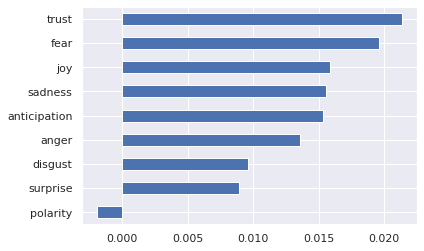

In [19]:
MOBYDICK[emo_cols].mean().sort_values().plot.barh()

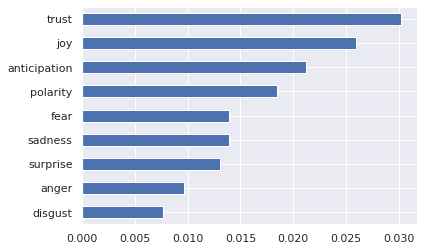

In [20]:
PERSUASION[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Chapter

In [21]:
MOBYDICK_chaps = MOBYDICK.groupby(CHAPS)[emo_cols].mean()

In [22]:
PERSUASION_chaps = PERSUASION.groupby(CHAPS)[emo_cols].mean()

In [23]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

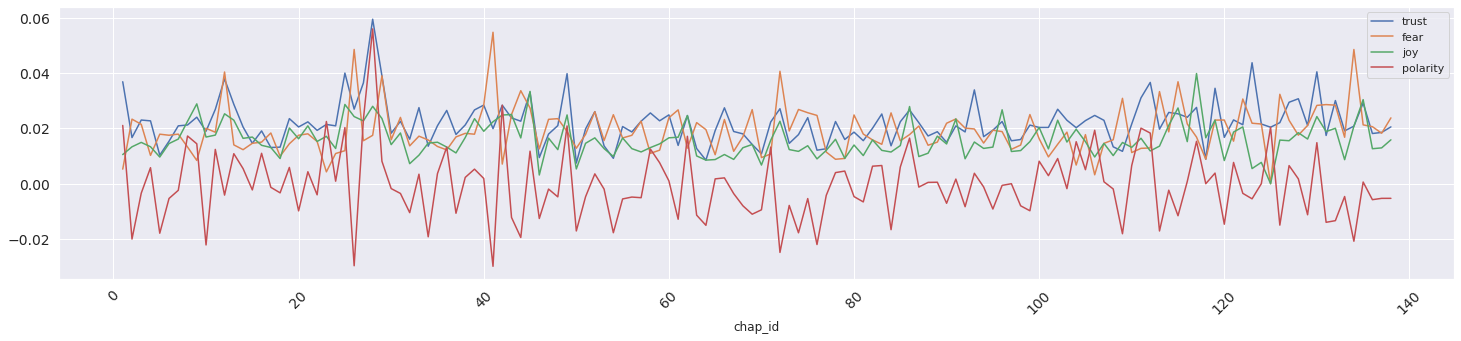

In [24]:
plot_sentiments(MOBYDICK_chaps, ['trust','fear','joy','polarity'])

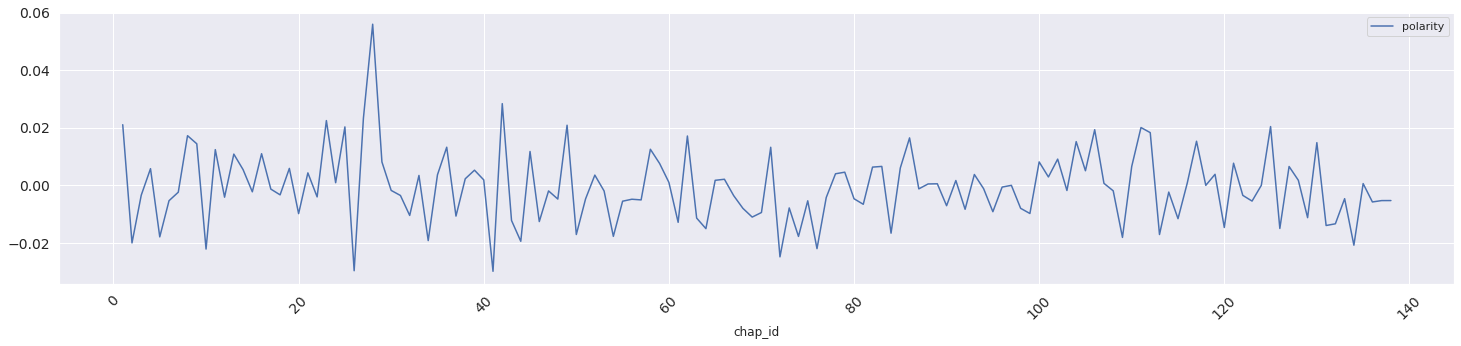

In [28]:
plot_sentiments(MOBYDICK_chaps, ['polarity'])

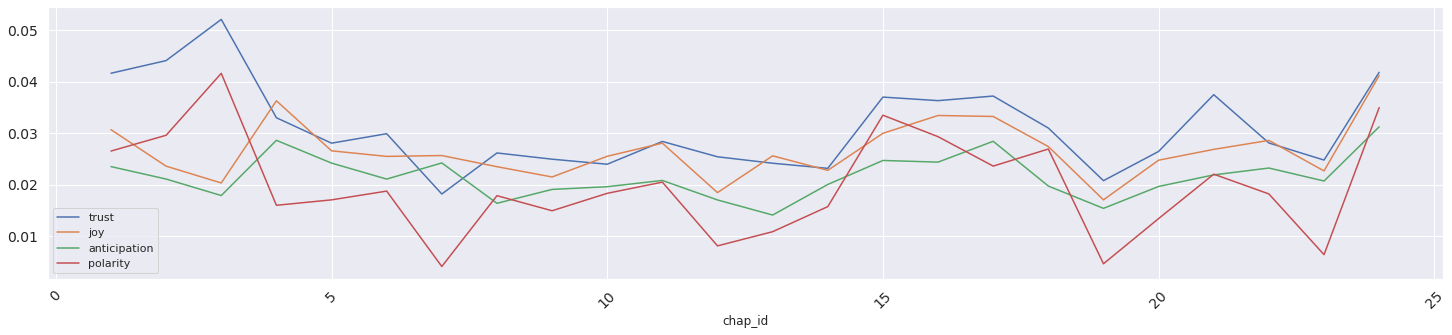

In [26]:
plot_sentiments(PERSUASION_chaps, ['trust','joy','anticipation','polarity'])

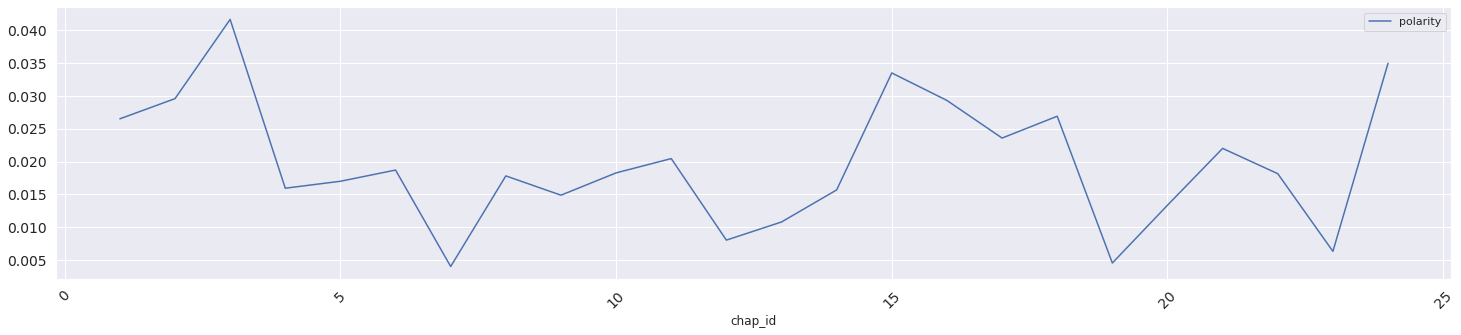

In [27]:
plot_sentiments(PERSUASION_chaps, ['polarity'])

# Explore Sentiment in Texts

In [29]:
MOBYDICK['html'] =  MOBYDICK.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
PERSUASION['html'] =  PERSUASION.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [30]:
MOBYDICK['html'].sample(10)

chap_id  para_num  sent_num
53       1         1               <span class='sent0'>would</span>
19       26        0                   <span class='sent0'>a</span>
48       21        1                <span class='sent0'>from</span>
56       1         3                <span class='sent0'>here</span>
76       38        0                 <span class='sent0'>The</span>
97       11        0           <span class='sent0'>belonging</span>
115      3         0                 <span class='sent0'>the</span>
49       3         1                 <span class='sent0'>all</span>
51       50        2            <span class='sent0'>Suddenly</span>
38       9         1             <span class='sent0'>instead</span>
Name: html, dtype: object

In [31]:
MOBYDICK_sents = MOBYDICK.groupby(SENTS)[emo_cols].mean()
PERSUASION_sents = PERSUASION.groupby(SENTS)[emo_cols].mean()

In [32]:
MOBYDICK_sents['sent_str'] = MOBYDICK.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
MOBYDICK_sents['html_str'] = MOBYDICK.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [33]:
PERSUASION_sents['sent_str'] = PERSUASION.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
PERSUASION_sents['html_str'] = PERSUASION.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [34]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [35]:
sample_sentences(MOBYDICK_sents)

Sentiment,ID,Sentence
-0.0217,"(17, 5, 3)",Merchant ships are but extension bridges armed ones but floating forts even pirates and privateers though following the sea as highwaymen the road they but plunder other ships other fragments of the land like themselves without seeking to draw their living from the bottomless deep itself
0.0,"(3, 0, 1)",GENESIS
0.0,"(113, 17, 2)",He answered certainly
0.0833,"(127, 3, 3)",all ye nations before my prow I bring the sun to ye
0.0,"(25, 17, 0)",It was curious and not unpleasing how Peleg and Bildad were affected at this juncture especially Captain Bildad
-0.04,"(4, 11, 3)",In much the same way do the commonalty lead their leaders in many other things at the same time that the leaders little suspect it
-0.2,"(16, 3, 1)",It was in Sag Harbor
0.0,"(27, 13, 5)",And who pronounced our glowing eulogy in Parliament
0.3333,"(3, 64, 16)",Ay Ay sir
0.0,"(58, 4, 5)",It has a sort of howdah on its back and its distended tusked mouth into which the billows are rolling might be taken for the Traitors Gate leading from the Thames by water into the Tower


In [36]:
sample_sentences(PERSUASION_sents)

Sentiment,ID,Sentence
0.0,"(18, 20, 5)",There are several odd looking men walking about here who I am told are sailors
0.0625,"(23, 70, 1)",To consider it as the certain wish of every being who could hope to influence you
0.0441,"(9, 19, 3)",It had then seemed the object nearest her heart that Dr Shirley the rector who for more than forty years had been zealously discharging all the duties of his office but was now growing too infirm for many of them should be quite fixed on engaging a curate should make his curacy quite as good as he could afford and should give Charles Hayter the promise of it
0.0,"(7, 16, 2)",Dear me
0.0,"(3, 30, 0)",You mean Mr Wentworth I suppose
0.0638,"(17, 30, 1)",She could not imagine a man more exactly what he ought to be than Mr Elliot nor did she ever enjoy a sweeter feeling than the hope of seeing him receive the hand of her beloved Anne in Kellynch church in the course of the following autumn
0.069,"(21, 3, 0)",Prettier musings of high wrought love and eternal constancy could never have passed along the streets of Bath than Anne was sporting with from Camden Place to Westgate Buildings
0.0,"(22, 20, 4)",But then it had been taken up by his father and mother
-0.0256,"(18, 29, 13)",And yet here are two gentlemen stuck up in it mightily at their ease and looking about them at the rocks and mountains as if they were not to be upset the next moment which they certainly must be
0.0714,"(20, 47, 13)",He begged her pardon but she must be applied to to explain Italian again


# VADER

In [38]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [39]:
MOBYDICK_vader_cols = MOBYDICK_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
MOBYDICK_vader = pd.concat([MOBYDICK_sents, MOBYDICK_vader_cols], axis=1)

In [40]:
MOBYDICK_vader.head()

anger  anticipation  disgust      fear  \
chap_id para_num sent_num                                              
1       0        0         0.000000           0.0      0.0  0.000000   
        1        0         0.000000           0.0      0.0  0.000000   
                 1         0.000000           0.0      0.0  0.000000   
                 2         0.066667           0.0      0.0  0.066667   
        2        0         0.000000           0.0      0.0  0.000000   

                                joy   sadness  surprise     trust  polarity  \
chap_id para_num sent_num                                                     
1       0        0         0.000000  0.100000  0.000000  0.100000  0.000000   
        1        0         0.000000  0.000000  0.000000  0.071429  0.071429   
                 1         0.000000  0.000000  0.000000  0.000000  0.000000   
                 2         0.000000  0.066667  0.000000  0.000000 -0.066667   
        2        0         0.041667  0.000000  0.020833  0.062500  0.062500   

                                                                    sent_str  \
chap_id para_num sent_num                                                      
1       0        0         supplied by a late consumptive usher to a gram...   
        1        0         the pale usher threadbare in coat heart body a...   
                 1         he was ever dusting his old lexicons and gramm...   
                 2         he loved to dust his old grammars it somehow m...   
        2        0         while you take in hand to school others and to...   

                                                                    html_str  \
chap_id para_num sent_num                                                      
1       0        0         <span class='sent0'>Supplied</span> <span clas...   
        1        0         <span class='sent0'>The</span> <span class='se...   
                 1         <span class='sent0'>He</span> <span class='sen...   
                 2         <span class='sent0'>He</span> <span class='sen...   
        2        0         <span class='sent0'>While</span> <span class='...   

                             neg    neu    pos  compound  
chap_id para_num sent_num                                 
1       0        0         0.000  1.000  0.000    0.0000  
        1        0         0.000  0.756  0.244    0.6369  
                 1         0.000  1.000  0.000    0.0000  
                 2         0.000  0.782  0.218    0.5994  
        2        0         0.122  0.819  0.060   -0.3268

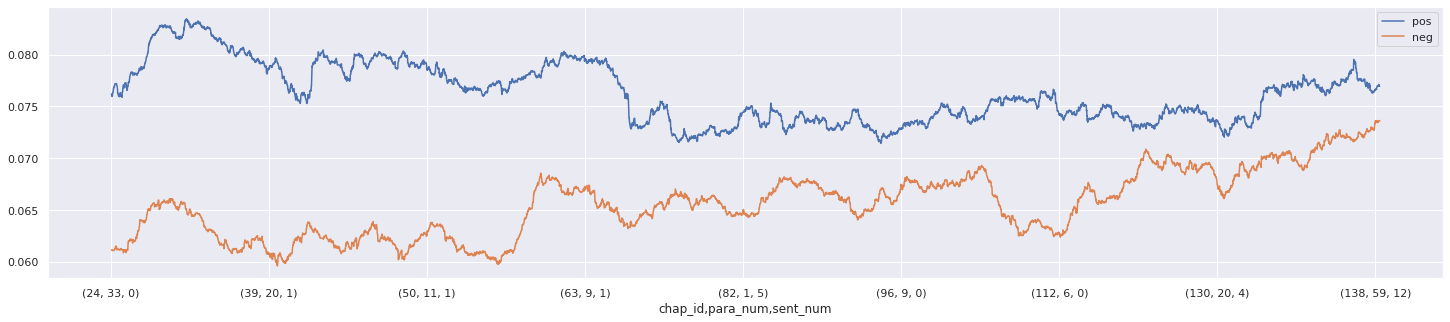

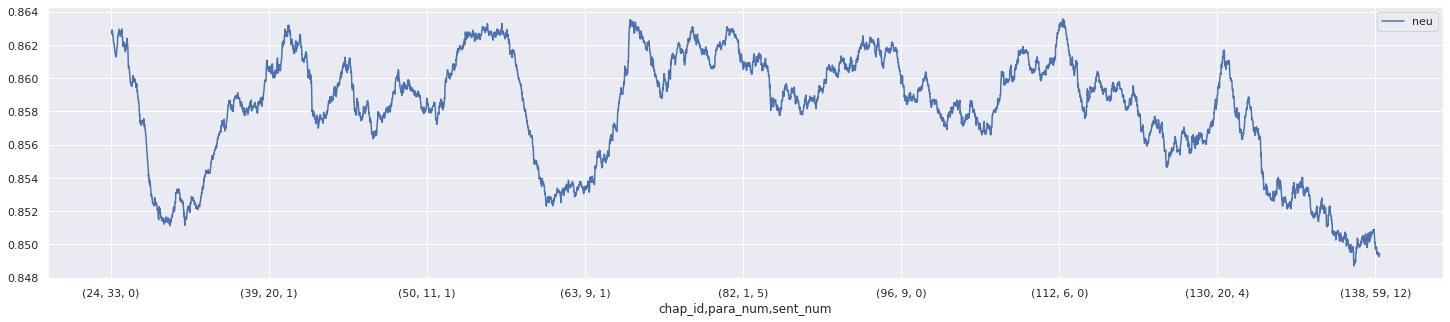

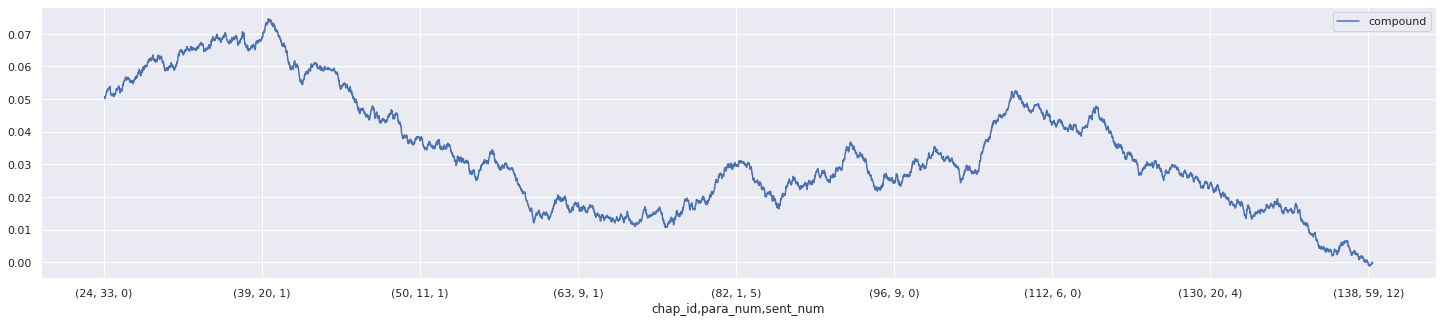

In [41]:
w = int(MOBYDICK_vader.shape[0] / 5)
MOBYDICK_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
MOBYDICK_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
MOBYDICK_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [42]:
PERSUASION_vader_cols = PERSUASION_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
PERSUASION_vader = pd.concat([PERSUASION_sents, PERSUASION_vader_cols], axis=1)

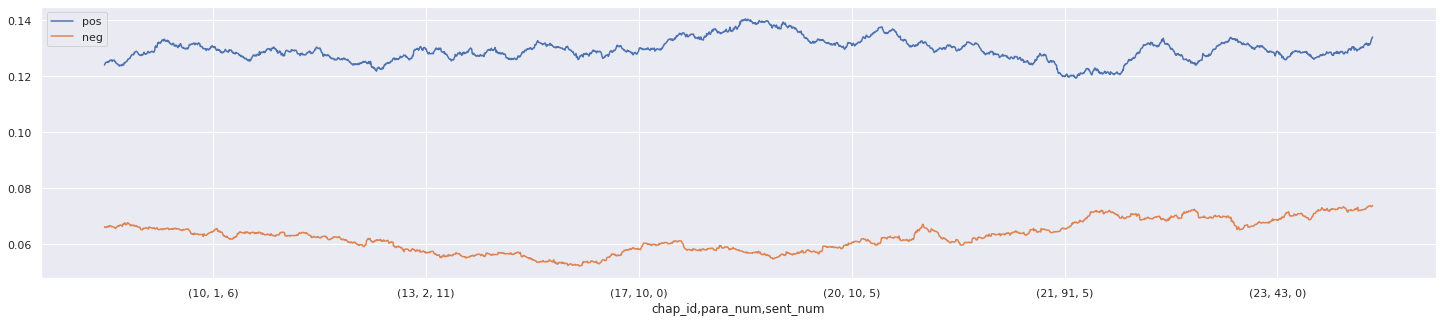

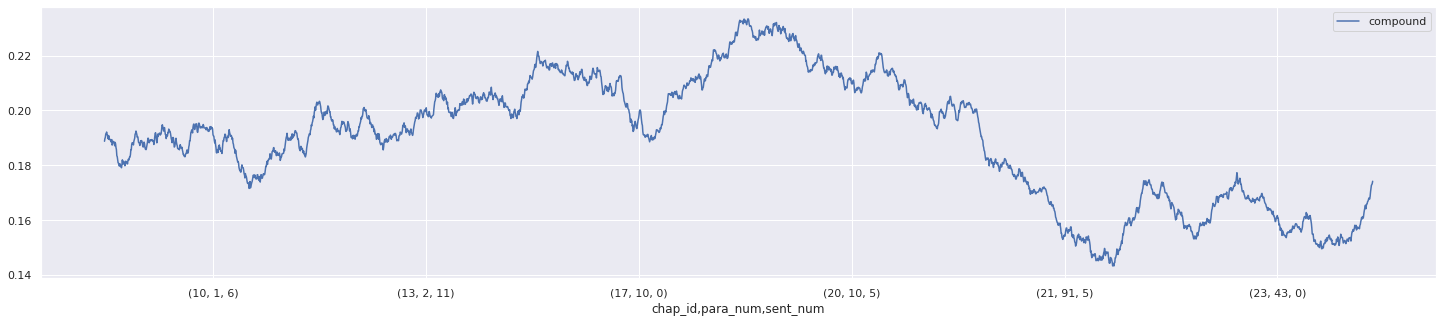

In [43]:
w = int(PERSUASION_vader.shape[0] / 5)
PERSUASION_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
PERSUASION_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))